# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [35]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns 
# 設定 data_path
dir_data = '/Users/lanjingyi/Documents/GitHub/2nd-ML100Days/data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [33]:
car_data=app_train[['TARGET','OWN_CAR_AGE']]
car_data['car_age']=car_data.loc[car_data['OWN_CAR_AGE'].isnull()==False,'OWN_CAR_AGE']
car_data['year_bins']=pd.cut(car_data['car_age'],range(0,70,5))
print(car_data['year_bins'].value_counts())

(5, 10]     29519
(0, 5]      26654
(10, 15]    21158
(15, 20]    12063
(20, 25]     5794
(60, 65]     3336
(25, 30]     2328
(30, 35]      947
(35, 40]      459
(40, 45]      151
(50, 55]       20
(45, 50]       14
(55, 60]        2
Name: year_bins, dtype: int64


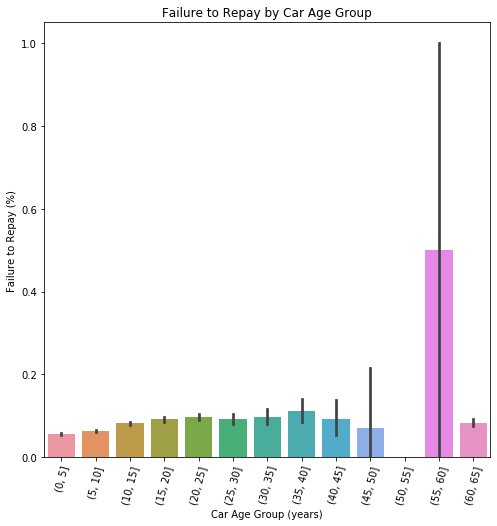

In [39]:
plt.figure(figsize = (8, 8))
px = car_data['year_bins']
py =  car_data['TARGET']
sns.barplot(px, py)

plt.xticks(rotation = 75)
plt.xlabel('Car Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Car Age Group');

In [41]:
car_data.groupby('year_bins').mean()

,TARGET,OWN_CAR_AGE,car_age
year_bins,,,
"(0, 5]",0.055939,2.862497,2.862497
"(5, 10]",0.063823,7.811782,7.811782
"(10, 15]",0.082238,12.961008,12.961008
"(15, 20]",0.091105,17.611125,17.611125
"(20, 25]",0.096824,22.776666,22.776666
"(25, 30]",0.091924,27.744845,27.744845
"(30, 35]",0.098205,32.741288,32.741288
"(35, 40]",0.111111,37.836601,37.836601
"(40, 45]",0.092715,42.238411,42.238411
